In [177]:
# importando bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [473]:
# Puxa o csv do usuario e trata as colunas
def pushUserData(user_name):
    df = pd.read_csv(f'participantes/dados/total/{user_name}.csv')
    df['data'] = pd.to_datetime(df['data'])
    df['dia'] = df['dia'].astype(str)
    df['seguidores'] = pd.to_numeric(df['seguidores'])
    df['seguindo'] = pd.to_numeric(df['seguindo'])
    df['posts'] = pd.to_numeric(df['posts'])
    return df

# Cria as colunas com as diferenças e a aceleração de seguidores, seguindo e posts
def createAuxCols(data):
    data['dif_seguidores'] = data['seguidores'].diff()
    data['acl_seguidores'] = data['dif_seguidores'].diff()
    data['dif_seguindo'] = data['seguindo'].diff()
    data['acl_seguindo'] = data['dif_seguindo'].diff()
    data['dif_posts'] = data['posts'].diff()
    data['dif_seguidores'] = pd.to_numeric(data['dif_seguidores'])
    data['acl_seguidores'] = pd.to_numeric(data['acl_seguidores'])
    data['dif_seguindo'] = pd.to_numeric(data['dif_seguindo'])
    data['acl_seguindo'] = pd.to_numeric(data['acl_seguindo'])
    data['dif_posts'] = pd.to_numeric(data['dif_posts'])
    n_dia = np.arange(0, data['dia'].shape[0]) + 1
    data['n_dia'] = n_dia
    data = data.fillna(0)
    return data


# Plota um lineplot único
def plot_line(title, data, x, y, xlabel, ylabel):
    sns.set_style('whitegrid')
    ax = sns.lineplot(x = x , y = y, data = data, linewidth = 5 )
    ax.figure.set_size_inches(15,7)
    ax.set_title(title, loc= 'center', fontsize = 18)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax = ax

def compare_plot(data, user):

    plt.figure(figsize = (17, 12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(f'Análise dos seguidores de @{user}', fontsize = 18, loc = 'center')
    
    g1 = sns.lineplot(x = 'data' , y = 'seguidores', data = data, linewidth = 5)
    g1.figure.set_size_inches(15,17)
    g1.set_xlabel('Tempo', fontsize=14)
    g1.set_ylabel('Seguidores', fontsize=14)

    plt.subplot(3, 1, 2)
    
    g2 = sns.lineplot(x = 'data' , y = 'dif_seguidores', data = data, linewidth = 5)
    g2.figure.set_size_inches(15,17)
    g2.set_xlabel('Tempo', fontsize=14)
    g2.set_ylabel('Ganho/Perda Diário', fontsize=14)

    plt.subplot(3, 1, 3)
    
    g3 = sns.lineplot(x = 'data' , y = 'acl_seguidores', data = data, linewidth = 5)
    g3.figure.set_size_inches(15,17)
    g3.set_xlabel('Tempo', fontsize=14)
    g3.set_ylabel('Aceleração', fontsize=14)

    ax = ax
    
def plot_mean_loss_by_day(data, user):
    aux_col = []
    for item in data['dif_seguidores']:
        if item != 0:
            aux_col.append(item * (-1))
        else:
            aux_col.append(item)
    data['dif_seguidores_aux'] = aux_col
    mean_lost_per_day = data.groupby(['dia']).mean()['dif_seguidores_aux'].astype(int).to_frame()
    mean_lost_per_day['dia'] = mean_lost_per_day.index
    mean_lost_per_day[''] = list(range(mean_lost_per_day.shape[0]))
    mean_lost_per_day = mean_lost_per_day.set_index('')
    re_arange = [mean_lost_per_day.iloc[0],
                 mean_lost_per_day.iloc[4],
                 mean_lost_per_day.iloc[6],
                 mean_lost_per_day.iloc[1],
                 mean_lost_per_day.iloc[2],
                 mean_lost_per_day.iloc[5],
                 mean_lost_per_day.iloc[3]]

    mean_lost_per_day = pd.concat(re_arange, axis = 1).T
    mean_lost_per_day[''] = list(range(mean_lost_per_day.shape[0]))
    mean_lost_per_day = mean_lost_per_day.set_index('')
    
    
    g1 = sns.barplot(x = 'dia', y = 'dif_seguidores_aux', data = mean_lost_per_day)
    g1.set_title(f'Média de seguidores perdidos de @{user} p/ dia da semana', fontsize = 18, loc = 'center')
    g1.figure.set_size_inches(15,7)
    g1.set_xlabel('Dia da Semana', fontsize=14)
    g1.set_ylabel('Média de Perda', fontsize=14)
    del data['dif_seguidores_aux']
    
    

    

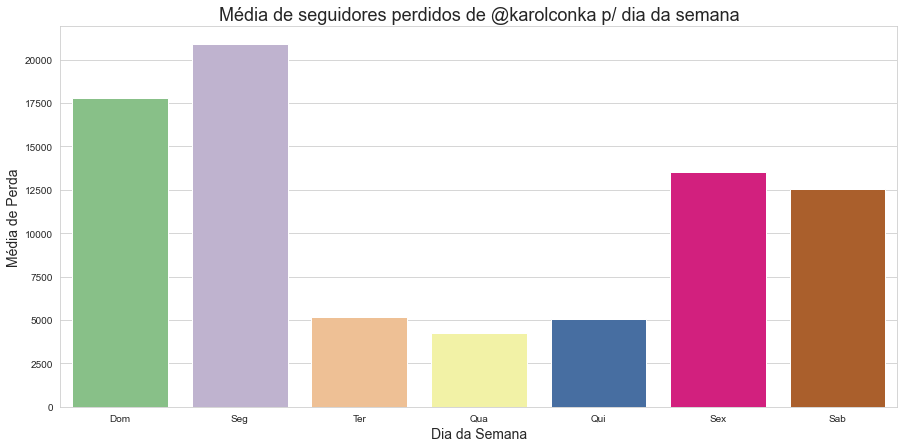

In [479]:
   
user = 'karolconka'
data = pushUserData(user)
data = createAuxCols(data)


# compare_plot(data, user)

plot_mean_loss_by_day(data, user)





In [400]:
def plot_line(title, data, x, y, xlabel, ylabel):
    sns.set_style('whitegrid')
    ax = sns.lineplot(x = x , y = y, data = data, linewidth = 5 )
    ax.figure.set_size_inches(15,7)
    ax.set_title(title, loc= 'center', fontsize = 18)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax = ax

def compare_plot(title, data, x, y1, y2, y3):

    plt.figure(figsize = (17, 12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(title, fontsize = 18, loc = 'center')
    
    g1 = sns.lineplot(x = x , y = y1, data = data, linewidth = 5)
    g1.figure.set_size_inches(15,17)
    g1.set_xlabel('Tempo', fontsize=14)
    g1.set_ylabel('Seguidores', fontsize=14)

    plt.subplot(3, 1, 2)
    
    g2 = sns.lineplot(x = x , y = y2, data = data, linewidth = 5)
    g2.figure.set_size_inches(15,17)
    g2.set_xlabel('Tempo', fontsize=14)
    g2.set_ylabel('Ganho/Perda Diário', fontsize=14)

    plt.subplot(3, 1, 3)
    
    g3 = sns.lineplot(x = x , y = y3, data = data, linewidth = 5)
    g3.figure.set_size_inches(15,17)
    g3.set_xlabel('Tempo', fontsize=14)
    g3.set_ylabel('Aceleração', fontsize=14)

    ax = ax

def plot_mean_loss_by_day(data):
    aux_col = []
    for item in data['dif_seguidores']:
        if item != 0:
            aux_col.append(item * (-1))
        else:
            aux_col.append(item)
    data['dif_seguidores_aux'] = aux_col
    mean_lost_per_day = data.groupby(['dia']).mean()['dif_seguidores_aux'].astype(int).to_frame()
    mean_lost_per_day['dia'] = mean_lost_per_day.index
    mean_lost_per_day[''] = list(range(mean_lost_per_day.shape[0]))
    mean_lost_per_day = mean_lost_per_day.set_index('')
    re_arange = [mean_lost_per_day.iloc[0],
                 mean_lost_per_day.iloc[4],
                 mean_lost_per_day.iloc[6],
                 mean_lost_per_day.iloc[1],
                 mean_lost_per_day.iloc[2],
                 mean_lost_per_day.iloc[5],
                 mean_lost_per_day.iloc[3]]

    mean_lost_per_day = pd.concat(re_arange, axis = 1).T
    mean_lost_per_day[''] = list(range(mean_lost_per_day.shape[0]))
    mean_lost_per_day = mean_lost_per_day.set_index('')
    g1 = sns.barplot(x = 'dia', y = 'dif_seguidores_aux', data = mean_lost_per_day)
    g1.figure.set_size_inches(15,7)
    g1.set_xlabel('Dia da Semana', fontsize=14)
    g1.set_ylabel('Média de Perda', fontsize=14)
    del data['dif_seguidores_aux']
    


In [246]:
title = f'Seguidores de {user}'
data = data
x = 'data'
y = 'seguidores'
xlabel = 'Tempo'
ylabel = 'Seguidores'

# plot_line(title, data, x, y, xlabel, ylabel)

In [247]:
title = f'Análise de seguidores da {user} durante o bbb21'
data = data
x = 'data'
y1 = 'seguidores'
y2 = 'dif_seguidores'
y3 = 'acl_seguidores'

# compare_plot(title, data, x, y1, y2, y3)

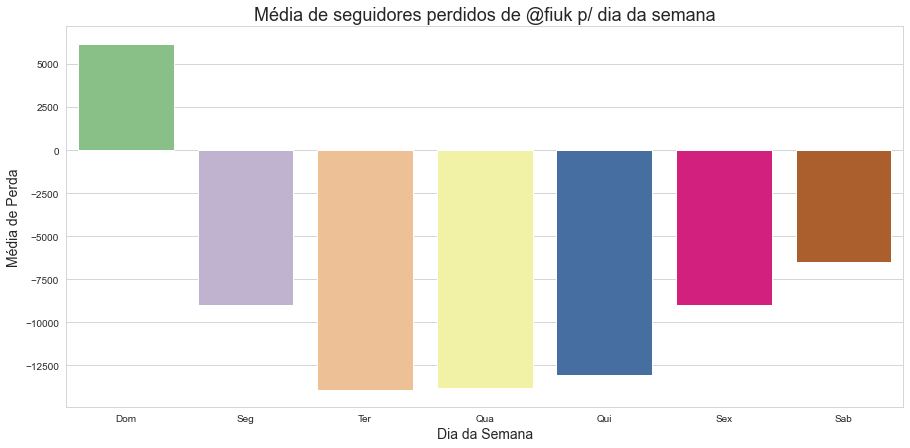

In [453]:
plot_mean_loss_by_day(data,'fiuk')

In [431]:
    df = pd.read_csv(f'participantes/dados/total/fiuk.csv')
    df['data'] = pd.to_datetime(df['data'])
    df['dia'] = df['dia'].astype(str)
    df['seguidores'] = pd.to_numeric(df['seguidores'])
    df['seguindo'] = pd.to_numeric(df['seguindo'])
#     df['posts'] = pd.to_numeric(df['posts'])
df.dtypes

data          datetime64[ns]
dia                   object
seguidores             int64
seguindo               int64
posts                 object
dtype: object

In [444]:
df = pd.read_csv(f'participantes/dados/19-02-2021/fiuk.csv')

In [445]:
df

,data,dia,seguidores,seguindo,posts
0,2021-02-06,Sab,2319810,1572,"1,212"
1,2021-02-07,Dom,2304593,1572,"1,213"
2,2021-02-08,Seg,2303697,1573,"1,214"
3,2021-02-09,Ter,2307721,1572,"1,215"
4,2021-02-10,Qua,2313045,1573,"1,215"
5,2021-02-11,Qui,2317122,1573,"1,216"
6,2021-02-12,Sex,2321097,1574,"1,217"
7,2021-02-13,Sab,2327047,1574,"1,219"
8,2021-02-14,Dom,2329887,1574,"1,221"
9,2021-02-15,Seg,2348833,1576,"1,223"
